In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()
sns.set(style='whitegrid')

# $H_2$ molecule

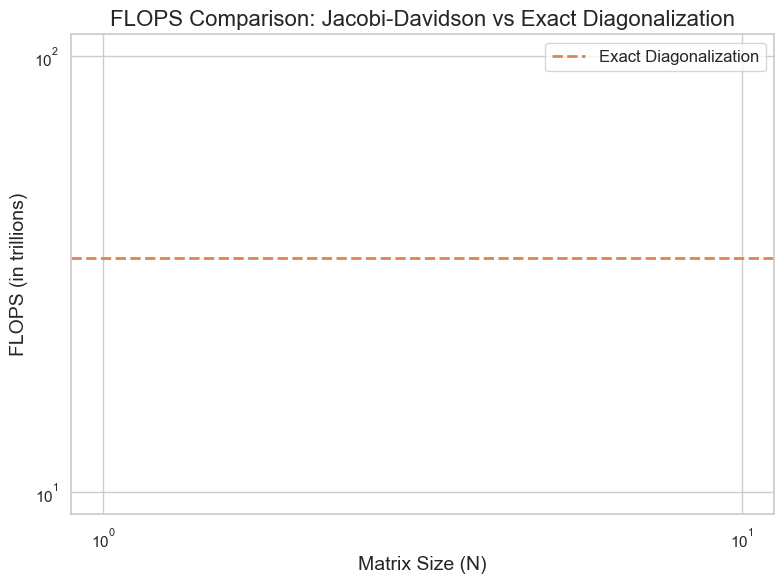

In [5]:
N_occ =1
N = np.array([10, 50, 100, 200])
N_JD = np.array([10, 15, 25, 50, 100, 200])

# Exact diagonalization flops
Exact_diago = 20*(11994)**3

#Jacobi davidson solution (block davidson)


# Deflation algorithm


plt.figure(figsize=(8,6))
# plt.plot(N_JD, FLOPS_JD_alpha8/1e12, marker='o', color=colors[0], label='Jacobi-Davidson', linewidth=2, markersize=8)
plt.axhline(y=Exact_diago/1e12, color=colors[1], linestyle='--', label='Exact Diagonalization', linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Matrix Size (N)', fontsize=14)
plt.ylabel('FLOPS (in trillions)', fontsize=14)
plt.title('FLOPS Comparison: Jacobi-Davidson vs Exact Diagonalization', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# $CH_2O$

In [6]:
exact_diago = 20*(27643)**3

# Computed eigenvalues 
N_JD = np.array([10, 15, 25, 50, 100, 200]) *6
N_block = np.array([10, 15, 17, 19, 21, 23]) *6
N_defl = np.array([10, 50, 100, 200]) *6

# standard (diagonal preconditioner) davidson 
FLOPS_4 = np.array([4640589149100, 7421795065530, 14166167468682, 20869785341010, 311908520004600, 3041267507394030])
FLOPS_8 = np.array([4405801238340, 7247024095410, 8251693168158, 12535766414262, 18027893195046, 779828189847582])
FLOPS_10 = np.array([5082833501100, 7732455154650, 10671336177942, 12007060296594, 14738465704914, 470107469051082])

# Block jacobi davidson FLOPS 
FLOPS_JD_alpha8 = np.array([63312098850630, 98032487542710, 140025476232930, 280621819242990, 479229805445190, 715969124779980]) # alpha is indifferent in this case, thus we can exclude it

# Deflation algorithm with diagonal preconditioner
FLOPS_25_def = np.array([6415065628956, 27845261539523, 70674758645938, 99597905113222])


# deflation algorithm JD
FLOPS_defl_JD_beta25 = np.array([142091000326528, 470975066856746, 1007420725217465, 2324769749006315])
FLOPS_defl_JD_beta40 = np.array([117862743281293, 483345166911878, 824178561777138])

# mix JD and diagonal preconditioner
FLOPS_beta16 = np.array([4201528375541, 104266141454671, 41070075286370, 86625043818120])
FLOPS_beta25 = np.array([3541251633876, 176523547168970, 151131919263263, 74279594974926])
FLOPS_beta32 = np.array([4200266880486, 195047635448971, 244404140181504, 71012630660365])

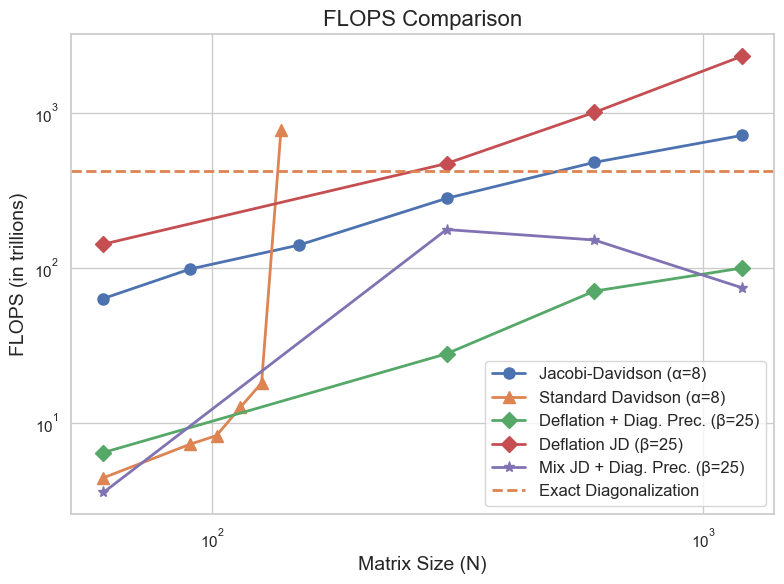

In [7]:
plt.figure(figsize=(8,6))

# ======================== BLOCK DAVIDSON ==========================
plt.plot(N_JD, FLOPS_JD_alpha8/1e12, marker='o', color=colors[0], label='Jacobi-Davidson (α=8)', linewidth=2, markersize=8)
# plt.plot(N_block, FLOPS_10/1e12, marker='s', color=colors[2], label='Standard Davidson (α=10)', linewidth=2, markersize=8)
plt.plot(N_block, FLOPS_8/1e12, marker='^', color=colors[1], label='Standard Davidson (α=8)', linewidth=2, markersize=8)
# plt.plot(N_block, FLOPS_4/1e12, marker='x', color=colors[4], label='Standard Davidson (α=4)', linewidth=2, markersize=8)

# ======================== DEFLATION + DIAGONAL PRECONDITIONER ==========================
plt.plot(N_defl, FLOPS_25_def/1e12, marker='D', color=colors[2], label='Deflation + Diag. Prec. (β=25)', linewidth=2, markersize=8)

# ======================== DEFLATION JD ==========================
plt.plot(N_defl, FLOPS_defl_JD_beta25/1e12, marker='D', color=colors[3], label='Deflation JD (β=25)', linewidth=2, markersize=8)
# plt.plot(N_defl[:-1], FLOPS_defl_JD_beta40/1e12, marker='v', color=colors[6], label='Deflation JD (β=40)', linewidth=2, markersize=8)

# ======================== MIX JD + DIAGONAL PRECONDITIONER ==========================
# plt.plot(N_defl, FLOPS_beta16/1e12, marker='P', color=colors[7], label='Mix JD + Diag. Prec. (β=16)', linewidth=2, markersize=8)
plt.plot(N_defl, FLOPS_beta25/1e12, marker='*', color=colors[4], label='Mix JD + Diag. Prec. (β=25)', linewidth=2, markersize=8)
# plt.plot(N_defl, FLOPS_beta32/1e12, marker='X', color=colors[9], label='Mix JD + Diag. Prec. (β=32)', linewidth=2, markersize=8)



plt.axhline(y=exact_diago/1e12, color=colors[1], linestyle='--', label='Exact Diagonalization', linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Matrix Size (N)', fontsize=14)
plt.ylabel('FLOPS (in trillions)', fontsize=14)
plt.title('FLOPS Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Description of this plot

1) Standard Davidson is the standard davidson algorithm with diagonal preconditioning 
2) Jacobi-Davidson block algorithm
3) Deflation + diagonal preconditioning (no JD implemented)
4) Deflation JD = JD with deflation
5) Mix JD and Diag prec = use jacobi davidson only after x iterations
6) Exact diagonalization = LAPACK


# Uracil

In [8]:
N_occ = 21
N_virt = 32416

N_block = np.array([10, 15, 20]) * N_occ
N = np.array([10, 50, 100, 200]) * N_occ
N_JD = np.array([10, 15, 25, 50, 100, 200]) * N_occ

exact_diago = 20*(N_virt)**3

# standard (diagonal preconditioner) davidson
FLOPS_8 = np.array([22282635345600, 41232042450900, 2019798514366080])

# Block JD --> not ready yet
FLOPS_defl_JD_alpha8 = np.array([358260150836832, 547093405159164])

# Deflation algorithm with diagonal preconditioner
FLOPS_25_def1 = np.array([21704563957828, 120351328951380, 331796334339744, 988466468666572])
FLOPS_40_def1 = np.array([22727538148004, 126629076279900, 347962601472256, 798235645111392])

# mix JD and diagonal preconditioner
FLOPS_16_defmix = np.array([16789885791684, 550048536421856, 402515274556556, 477869930787196])

# deflation with JD
FLOPS_25_def_JD = np.array([403750933287712,2072475448900708])

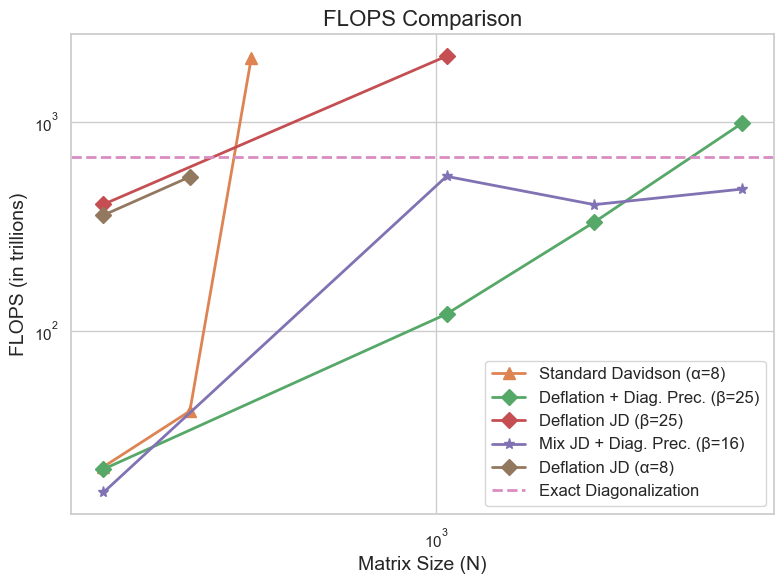

In [9]:
plt.figure(figsize=(8,6))

# ======================== BLOCK DAVIDSON ==========================
plt.plot(N_block, FLOPS_8/1e12, marker='^', color=colors[1], label='Standard Davidson (α=8)', linewidth=2, markersize=8)

# ======================== DEFLATION + DIAGONAL PRECONDITIONER ==========================
plt.plot(N, FLOPS_25_def1/1e12, marker='D', color=colors[2], label='Deflation + Diag. Prec. (β=25)', linewidth=2, markersize=8)
# plt.plot(N, FLOPS_40_def1/1e12, marker='v', color=colors[6], label='Deflation + Diag. Prec. (β=40)', linewidth=2, markersize=8)

# ======================== DEFLATION JD ==========================
plt.plot(N[:-2], FLOPS_25_def_JD/1e12, marker='D', color=colors[3], label='Deflation JD (β=25)', linewidth=2, markersize=8)

# ======================== MIX JD + DIAGONAL PRECONDITIONER ==========================
plt.plot(N, FLOPS_16_defmix/1e12, marker='*', color=colors[4], label='Mix JD + Diag. Prec. (β=16)', linewidth=2, markersize=8)

# ========================= BLOCK JD ==========================
plt.plot(N_JD[:2], FLOPS_defl_JD_alpha8/1e12, marker='D', color=colors[5], label='Deflation JD (α=8)', linewidth=2, markersize=8)

# ========================= EXACT DIAGONALIZATION ==========================
plt.axhline(y=exact_diago/1e12, color=colors[6], linestyle='--', label='Exact Diagonalization', linewidth=2)


plt.yscale('log')
plt.xscale('log')
plt.xlabel('Matrix Size (N)', fontsize=14)
plt.ylabel('FLOPS (in trillions)', fontsize=14)
plt.title('FLOPS Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()